# Lassa data set evaluation

In [26]:
import pandas as pd
from matplotlib import pyplot as plt

In [27]:
def histograms(stats):
    # Creating histograms with custom labels
    fig, axes = plt.subplots(1, 4, figsize=(10, 3))  # Adjust grid if you have a different layout

    stats[['N_share', 'Length', 'RelativeLength', 'RelativeError']].hist(
        bins=50, log=True, ax=axes
    )

    # Setting y-axis label for the left column
    axes[0].set_ylabel('Number of sequences')

    axes[0].set_xlim(0, 1)
    axes[1].set_xlim(left=0)
    axes[2].set_xlim(left=0)
    axes[3].set_xlim(0, 1)

    # Setting x-axis labels with the feature names
    features = ['N_share', 'Length', 'RelativeLength', 'RelativeError']
    for ax, feature in zip(axes.flatten(), features):
        ax.set_xlabel(feature)
        ax.set_title('')  # Remove the title above each plot

    plt.tight_layout()
    plt.show()

# Parameters

In [28]:
fname_stats = ''
fname_sequences = ''
outdir = ''

minlen = 2000
max_n_share = 0.01
min_relative_length = 0.95
min_ref_cov = 0.8

In [29]:
# Parameters
fname_stats = "data/all/collected_stats.tsv"
fname_sequences = "/Volumes/DataCurate/CurationDatasets/Dengue/dengue_ncbi_20240105.fasta"
outdir = "data/filtered"


## Data ingestion.

We compute the following features
- the relative length of the sequence compared to the reference
- edit distance in relation to the match length
- the amount of the reference covered by the alignment
- the amount of the query covered by the alignment

In [30]:
seqstats = pd.read_csv(fname_stats, sep='\t')
seqstats['RelativeLength'] = seqstats['Length'] / seqstats['ReferenceLength']
seqstats['RelativeError'] = seqstats['EditDistance'] / (seqstats['ReferenceEnd'] - seqstats['ReferenceStart'])
seqstats['ReferenceCoverage'] = (seqstats['ReferenceEnd'] - seqstats['ReferenceStart']) / seqstats['ReferenceLength']
seqstats['QueryCoverage'] = (seqstats['QueryEnd'] - seqstats['QueryStart']) / seqstats['Length']

seqstats

,Sequence,Reference,IsForward,ReferenceStart,ReferenceEnd,QueryStart,QueryEnd,EditDistance,IsSupplementaryAlignment,N_share,Length,ReferenceLength,Segment,RelativeLength,RelativeError,ReferenceCoverage,QueryCoverage
0,NC_002640.1,NC_002640.1,True,0.0,10649.0,0.0,10649.0,0.0,False,0.0,10649,10649.0,Unsegmented,1.000000,0.000000,1.000000,1.0
1,PQ669454.1,NC_002640.1,True,10262.0,10649.0,0.0,386.0,16.0,False,0.0,386,10649.0,Unsegmented,0.036248,0.041344,0.036341,1.0
2,PQ669455.1,NC_002640.1,True,10262.0,10649.0,0.0,386.0,15.0,False,0.0,386,10649.0,Unsegmented,0.036248,0.038760,0.036341,1.0
3,PQ670834.1,NC_002640.1,True,0.0,149.0,0.0,150.0,5.0,False,0.0,150,10649.0,Unsegmented,0.014086,0.033557,0.013992,1.0
4,PQ670835.1,NC_002640.1,True,0.0,149.0,0.0,150.0,5.0,False,0.0,150,10649.0,Unsegmented,0.014086,0.033557,0.013992,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52362,AX465618.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,73,NaN,NaN,NaN,NaN,NaN,NaN
52363,AX465641.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,67,NaN,NaN,NaN,NaN,NaN,NaN
52364,M32957.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,240,NaN,NaN,NaN,NaN,NaN,NaN
52365,M32959.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,240,NaN,NaN,NaN,NaN,NaN,NaN


Overall length and N_share distribution before any filtering has happened.

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'N_share'}>]], dtype=object)

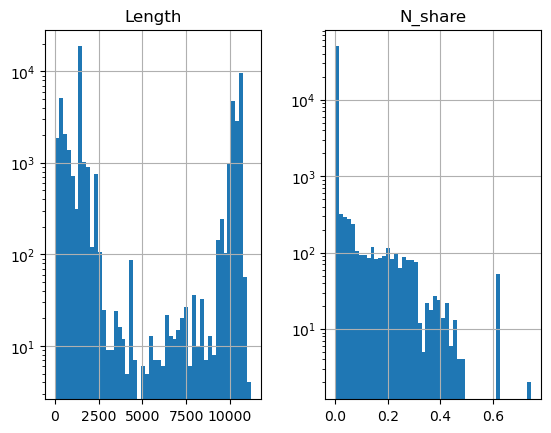

In [31]:
seqstats[['Length', 'N_share']].hist(bins=50, log=True)

## Removing unaligned sequences.

We remove all sequences that were not mapped. Let's have a look at the 10 largest sequences first.

In [32]:
unmapped = seqstats[seqstats['IsForward'].isna()][['Sequence', 'Length', 'N_share']]
print(f'Number of unmapped reads={len(unmapped)}')
unmapped.nlargest(10, ['Length'])

Number of unmapped reads=689


,Sequence,Length,N_share
51809,MH048676.1,10680,0.0
51808,MH048674.1,10677,0.0
51736,OF202432.1,1710,0.0
51753,MP879435.1,1710,0.0
51936,LQ729849.1,1082,0.0
51807,LY720052.1,1056,0.0
51935,LQ729848.1,916,0.0
51724,ON714593.1,888,0.0
51729,ON714647.1,888,0.0
51725,ON714594.1,780,0.0


array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'N_share'}>]], dtype=object)

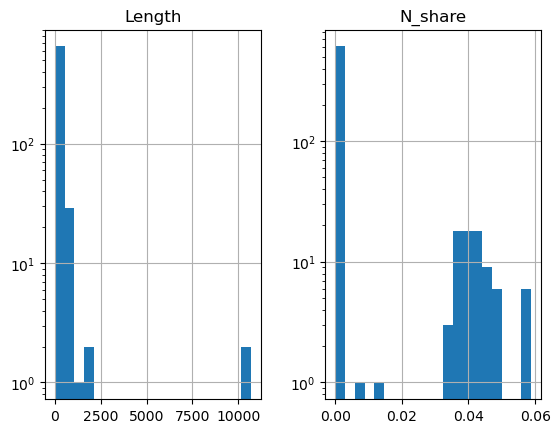

In [33]:
unmapped.hist(bins=20, log=True)

In [34]:
seqstats_mapped = seqstats.dropna(subset='Reference')

## Removing supplementary alignments

Additional to the best hit, minimap2 also sometimes computes supplementary alignments. We remove them here.

In [35]:
seqstats_primary = seqstats_mapped[seqstats_mapped['IsSupplementaryAlignment'] == False]

## Remove short sequences and those with too many Ns

In [57]:
seqstats_minlen = seqstats_primary[seqstats_primary['Length'] >= minlen]
seqstats_high_coverage = seqstats_minlen[seqstats_minlen['N_share'] <= max_n_share]

print('Before filtering:', len(seqstats_primary))
print(f'N-share larger than {max_n_share}:', len(seqstats_primary[seqstats_primary['N_share'] > max_n_share]))
print(f'Length smaller than {minlen}:', len(seqstats_primary[seqstats_primary['Length'] < minlen]))
print('After filtering:', len(seqstats_high_coverage))

Before filtering: 50495
N-share larger than 0.01: 1703
Length smaller than 2000: 31362
After filtering: 17490


## Remove too short genomes
We remove the genomes that are too short compared to the reference genome.

In [58]:
seqstats_long_seqs = seqstats_high_coverage[seqstats_high_coverage['RelativeLength'] > min_relative_length]
print(
    f'{len(seqstats_long_seqs)} of {len(seqstats_high_coverage)} sequences '
    f'remain after filtering for {min_relative_length} minimum relative length'
)

12595 of 17490 sequences remain after filtering for 0.95 minimum relative length


Additionally we remove all sequences, where the alignment does not cover enough of the target genome.

In [59]:
seqstats_long_seqs.nsmallest(10, ['ReferenceCoverage'])

,Sequence,Reference,IsForward,ReferenceStart,ReferenceEnd,QueryStart,QueryEnd,EditDistance,IsSupplementaryAlignment,N_share,Length,ReferenceLength,Segment,RelativeLength,RelativeError,ReferenceCoverage,QueryCoverage
9511,OK573326.1,NC_001477.1,False,127.0,10303.0,0.0,10176.0,810.0,False,0.0,10300,10735.0,Unsegmented,0.959478,0.079599,0.947927,0.987961
45785,MT006158.1,NC_001475.2,True,94.0,10245.0,0.0,10154.0,832.0,False,0.0,10173,10707.0,Unsegmented,0.950126,0.081962,0.948071,0.998132
45784,MT006152.1,NC_001475.2,True,94.0,10264.0,0.0,10173.0,768.0,False,0.0,10173,10707.0,Unsegmented,0.950126,0.075516,0.949846,1.000000
42340,PP152119.1,NC_001475.2,True,94.0,10266.0,0.0,10172.0,778.0,False,0.0,10172,10707.0,Unsegmented,0.950033,0.076484,0.950033,1.000000
42349,PP152128.1,NC_001475.2,True,94.0,10266.0,0.0,10172.0,765.0,False,0.0,10172,10707.0,Unsegmented,0.950033,0.075206,0.950033,1.000000
43447,OR393932.1,NC_001475.2,True,94.0,10266.0,0.0,10172.0,765.0,False,0.0,10173,10707.0,Unsegmented,0.950126,0.075206,0.950033,0.999902
43448,OR393950.1,NC_001475.2,True,94.0,10266.0,0.0,10172.0,758.0,False,0.0,10173,10707.0,Unsegmented,0.950126,0.074518,0.950033,0.999902
43449,OR393954.1,NC_001475.2,True,94.0,10266.0,0.0,10172.0,759.0,False,0.0,10173,10707.0,Unsegmented,0.950126,0.074617,0.950033,0.999902
43450,OR393955.1,NC_001475.2,True,94.0,10266.0,0.0,10172.0,758.0,False,0.0,10173,10707.0,Unsegmented,0.950126,0.074518,0.950033,0.999902
43451,OR393958.1,NC_001475.2,True,94.0,10266.0,0.0,10172.0,767.0,False,0.0,10173,10707.0,Unsegmented,0.950126,0.075403,0.950033,0.999902


In [60]:
seqstats_min_ref_cov = seqstats_long_seqs[seqstats_long_seqs['ReferenceCoverage'] >= min_ref_cov]
print(f'Keeping {len(seqstats_min_ref_cov)} of {len(seqstats_long_seqs)} sequences')

Keeping 12595 of 12595 sequences


## Per reference genome counts
Let's have a look what is left after filtering with respect to the distinct reference genomes.

In [61]:
ref_counts_raw = seqstats_primary['Reference'].value_counts()
ref_counts_minlen = seqstats_minlen['Reference'].value_counts()
ref_counts_high_cov = seqstats_high_coverage['Reference'].value_counts()
ref_counts_filtered = seqstats_min_ref_cov['Reference'].value_counts()
pd.DataFrame({'Raw': ref_counts_raw, 'MinLen': ref_counts_minlen, 'MaxN': ref_counts_high_cov,  'Filtered': ref_counts_filtered})

,Raw,MinLen,MaxN,Filtered
Reference,,,,
NC_001477.1,19548,7450,6866,4521
NC_001474.2,17186,6872,6288,4103
NC_001475.2,9220,3228,2975,2715
NC_002640.1,4541,1583,1361,1256


## Statistics after filtering

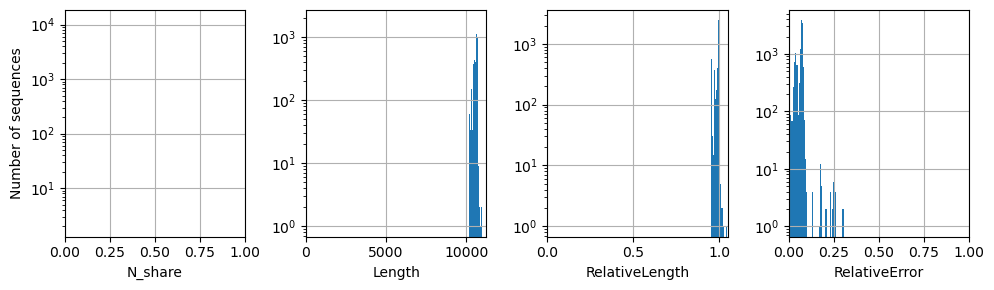

In [62]:
histograms(seqstats_min_ref_cov)

## Read orientation
Finally, lets get the filtered reads with harmonized orientation sorted into the Segments.

In [63]:
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
import os

df_filtered_final = seqstats_min_ref_cov
os.makedirs(outdir, exist_ok=True)

segments = sorted(set(df_filtered_final['Segment'])) 
fname_template_out = os.path.join(outdir, "{}.fasta")

outfiles = {
    segment: open(fname_template_out.format(segment), 'w')
    for segment in segments
}

segment_and_orientation = {
    row['Sequence']: (row['IsForward'], row['Segment'])
    for _, row in df_filtered_final.iterrows()
}

for record in SeqIO.parse(fname_sequences, "fasta"):
    if record.id not in segment_and_orientation:
        continue
    is_forward, segment = segment_and_orientation[record.id]
    if is_forward is None:
        raise RuntimeError(f"Invalid orientation {is_forward}")
    orientation = 'forward' if is_forward else 'reverse'
    new_record = SeqRecord(
        seq=record.seq if is_forward else record.seq.reverse_complement(),
        id=record.id,
        name=record.name,
        description=f'{record.description}|{orientation}|{segment}'
    )
    SeqIO.write(new_record, outfiles[segment], "fasta")

for outfile in outfiles.values():
    outfile.close()